<h1 style="Comic Sans MS; text-align: center; color: #FFC300">Final Project</h1>
<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Exploratory Data Analysis</h3>
<p style="color: pink">The goals of the exploratory data analysis are:</p>
<ul style="color: pink">
    <li>to better understand the data,</li>
    <li>to evaluate if the given dataset is suitable for the K-Means clustering task.</li>
</ul>
<p style="color: pink">We need to:</p>
<ol style="color: pink">
    <li>Load the given Banknote authentication dataset.</li>
    <li>Calculate statistical measures, e.g. mean and standard deviation.</li>
    <li>Visualise the data as we consider fit.</li>
    <li>Evaluate if the given dataset is suitable for the K-Means clustering task.</li>
    <li>Write a short description of the dataset and our evaluation of its suitability for the K-Means clustering task.</li>
</ol>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [3]:
file_path = 'C:/Users/Jorge Payà/Desktop/4GeeksAcademy/DSML Bootcamp/KMeans-project/data/raw/Banknote-authentication-dataset.csv'
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


(None,
         V1      V2
 0  3.62160  8.6661
 1  4.54590  8.1674
 2  3.86600 -2.6383
 3  3.45660  9.5228
 4  0.32924 -4.4552)

<p style="color: pink">The dataset contains 1,372 entries with two continuous numerical attributes: V1 (variance of Wavelet Transformed image) and V2 (skewness of Wavelet Transformed image). There are no missing values, and both columns are of type float64. Next, I'll compute statistical measures such as the mean and standard deviation.</p>

In [4]:
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


<p style="color: pink">The statistical summary shows:
<ul style="color: pink">
    <li>V1 (variance): Mean = 0.43, Std = 2.84, Range = [-7.04, 6.82]</li>
    <li>V2 (skewness): Mean = 1.92, Std = 5.87, Range = [-13.77, 12.95]</li>
</ul>
<p style="color: pink">Both attributes have a wide range and significant variability, which suggests that clustering might be feasible. Now, I'll visualize the data to assess its distribution and potential clustering patterns.</p>

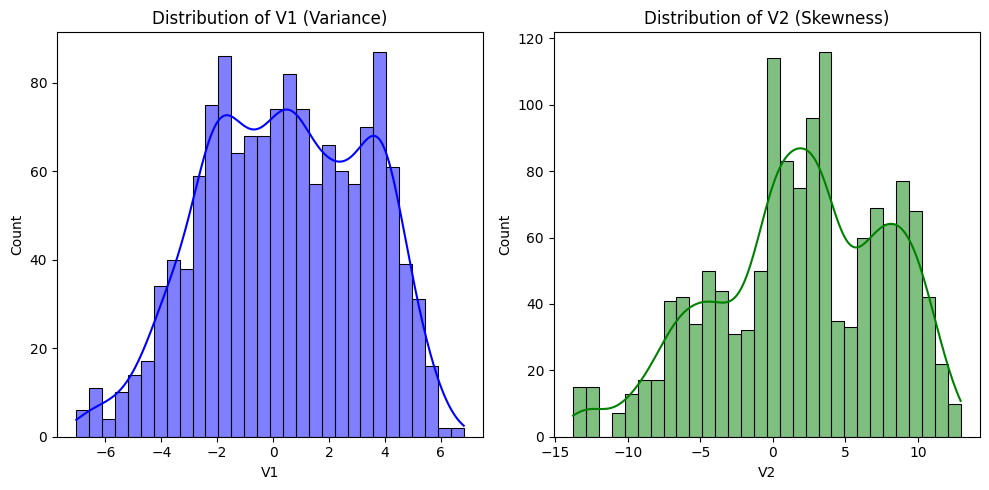

In [5]:
plt.figure(figsize=(10, 5))
# Histogram for V1
plt.subplot(1, 2, 1) # (rows, columns, panel number)
sns.histplot(df['V1'], bins=30, color='blue', kde=True) # kde = kernel density estimation
plt.title('Distribution of V1 (Variance)')

# Histogram for V2
plt.subplot(1, 2, 2)
sns.histplot(df['V2'], bins=30, color='green', kde=True)
plt.title('Distribution of V2 (Skewness)')

plt.tight_layout()
plt.show()

<p style="color: pink">The histograms show that V1 (variance) has a roughly symmetric distribution, while V2 (skewness) is more spread out with noticeable peaks. Next, I'll create a scatter plot to examine if the data naturally forms cluster.</p>

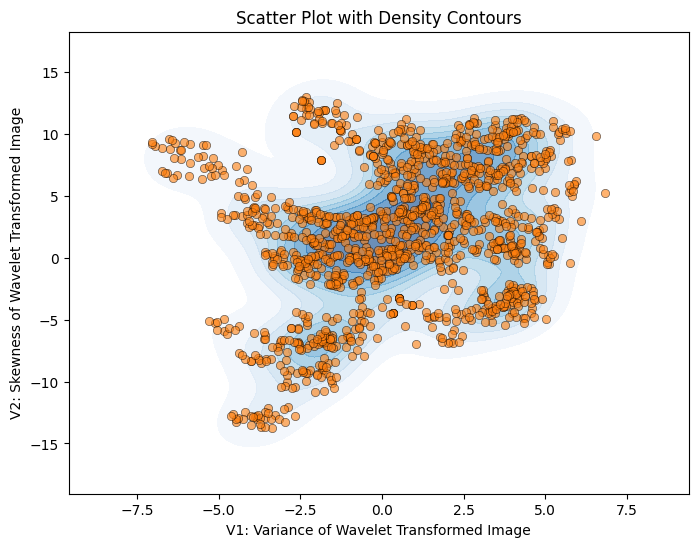

In [6]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['V1'], y=df['V2'], fill=True, cmap='Blues', alpha=0.6)
sns.scatterplot(x=df['V1'], y=df['V2'], edgecolor='black', alpha=0.6)
plt.xlabel('V1: Variance of Wavelet Transformed Image')
plt.ylabel('V2: Skewness of Wavelet Transformed Image')
plt.title('Scatter Plot with Density Contours')
plt.show()

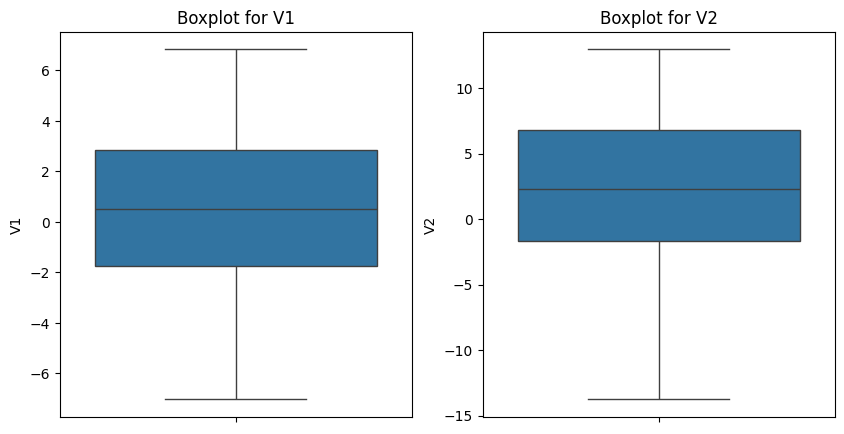

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['V1'])
plt.title('Boxplot for V1')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['V2'])
plt.title('Boxplot for V2')
plt.show()

In [8]:
# The boxplot shows that there are no outliers in the data, but let's confirm it using z-scores:
z_scores = np.abs(zscore(df[['V1', 'V2']]))
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers: {outliers.sum()}')

Number of outliers: 0


<p style="color: pink">K-Means is sensitive to scale. Since V1 and V2 have different ranges and standard deviations, I will scale them</p>

In [10]:
features = ['V1', 'V2']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">2. Determine Optimal Number of Clusters (k)</h3>
<p style="color: pink">Now we determine the optimal number of clusters using the elbow method which consists on computing the sum of squared distances (inertia) for different k values and plot an elbow curve.</p>

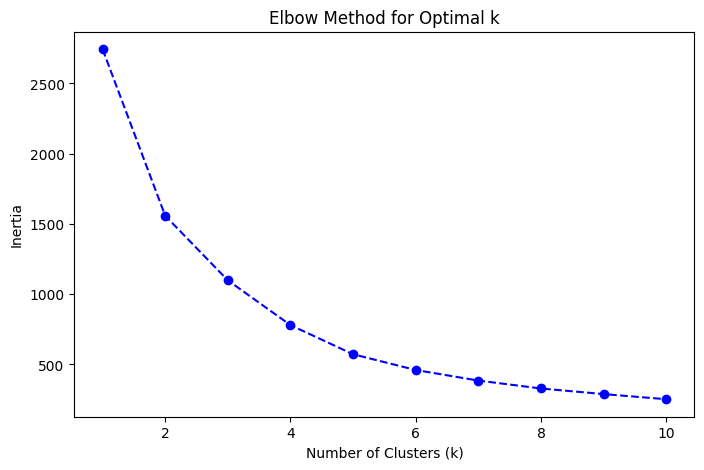

In [ ]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', color='blue', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

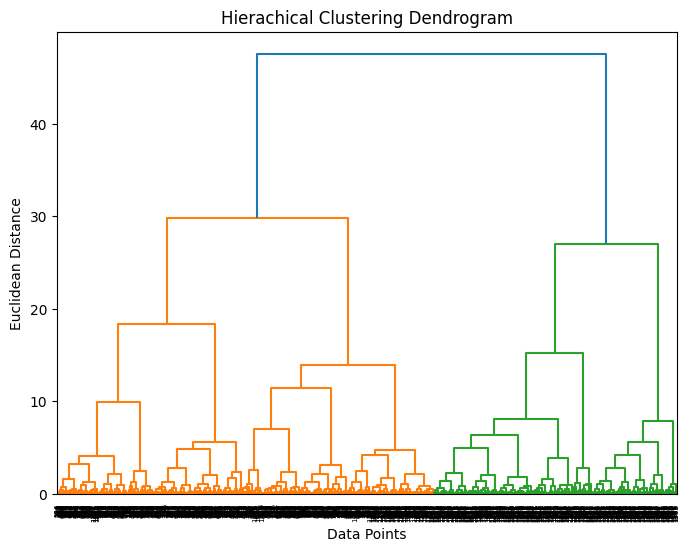

In [ ]:
# With a Dendogram we will assess the number of natural clusters in the data before applying KMeans
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(8, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierachical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

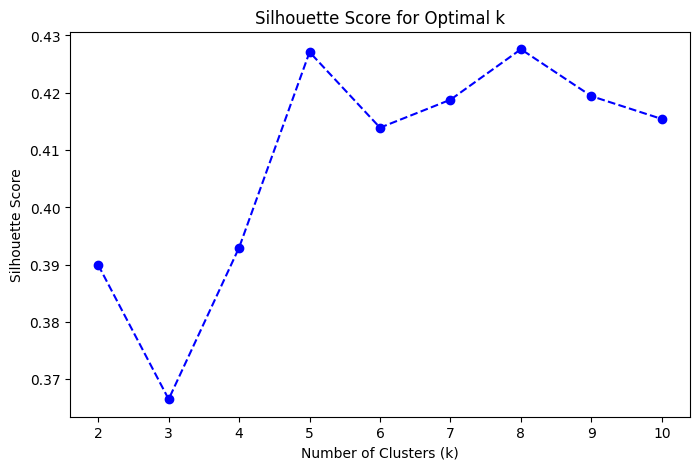

In [15]:
# With the dendorgram we can see that there are 2 natural clusters in the data
# We also want to use silhouette score to confirm the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='blue', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [ ]:
# The silhouette score confirms that the optimal number of clusters is 2, why? Because it is the highest value but the value 5 shows almost 0.43  


<p style="color: pink">Silhouette Score evaluates how well data points fit within their assigned clusters. Ranges from -1 to 1 (higher = better clustering):
<ul style="color: pink">
<li> >0.5 → Clear clustering structure.</li>
<li>0.2 - 0.5 → Some overlap but still valid.</li>
<li>  >0.2 → Poor separation, reconsider clustering method.</li>
</ul></p>

<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">3. Clustering</h3>
<p style="color: pink">The goal of this assignment is to use the Banknote authentication dataset to train a model that can predict if a banknote is genuine or not, steps are:</p>
<ol style="color: pink">
    <li>run K-means on the given dataset</li>
    <li>visualise the results.</li>
    <li>re-run K-means several times and visualise the results. </li>
    <li>compare the results: is the K-means algorithm stable?</li>
    <li>describe the results.</li>
</ol>

<p style="color: pink"></p>

<p style="color: pink"></p>